# Exit Survey Project

## Project Scope

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

## Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# explore dete
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
# take a look at some columns with missing values
dete_survey['Classification'].value_counts(normalize=True)

Primary              0.353846
Secondary            0.272527
A01-A04              0.145055
AO5-AO7              0.101099
Special Education    0.072527
AO8 and Above        0.030769
PO1-PO4              0.017582
Middle               0.006593
Name: Classification, dtype: float64

In [7]:
dete_survey['Business Unit'].value_counts()#(normalize=True)

Education Queensland                          54
Information and Technologies                  26
Training and Tertiary Education Queensland    12
Other                                         11
Human Resources                                6
Corporate Strategy and Peformance              5
Early Childhood Education and Care             3
Infrastructure                                 2
Policy, Research, Legislation                  2
Pacific Pines SHS                              1
Finance                                        1
Corporate Procurement                          1
Calliope State School                          1
Indigenous Education and Training Futures      1
Name: Business Unit, dtype: int64

In [8]:
dete_survey['Aboriginal'].value_counts()#(normalize=True)

Yes    16
Name: Aboriginal, dtype: int64

In [9]:
dete_survey['Torres Strait'].value_counts()#(normalize=True)

Yes    3
Name: Torres Strait, dtype: int64

In [10]:
# tete exploration
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [11]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [12]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [13]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

**Dete survey:**
- 56 columns; null values in: Classification (367), Business Unit (696), Aboriginal (806), Torres Strait (819), South Sea (815), Disability (799), NESB (790).
- Some columns might be ok to be transformed into 1=Yes and 0=No, like Aboriginal, Torres Strait that seem to show conditions/origins and record a NaN when it should be No.
- There are values 'Not Stated' which should be NaN as there is no real data
- Multiple hints at dissatisfaction in column names
- We can probably trim the dataset down a bit

**Tafe Survey:**
- 72 columns, many more missing values, customized values and also there are both NaN and other non values in the dataset.
- We can probably trim the dataset down a bit
- Multiple hints at dissatisfaction in column names
- Mostly same colums as Dete survey but with different names

## Data Cleanup Part 1

### Columns Dropping

In [14]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [15]:
dete_survey[dete_survey.columns[28:49]].head()

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M


In [16]:
dete_survey[dete_survey.columns[0:28]].head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,False,False,True
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,False,False,False,False,False,False,False
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,False,False,False,False,False,True
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,False,False,False
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,True,False,False


In [17]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

For **Dete Survey:** we dropped: 'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Information',
       'Kept informed', 'Wellness programs', 'Health & Safety', 
Because we can't interpret the values?

In [18]:
tafe_survey[tafe_survey.columns[18:66]].head()

,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,...,InductionInfo. On-line Topic:Did you undertake a Institute Induction?,InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?,InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?,InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.],InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?
0,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
1,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
2,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
3,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,-,-,-,-,-,Yes,Yes,Yes,Yes,Yes
4,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes


In [19]:
tafe_survey[tafe_survey.columns[18:66]].columns

Index(['InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive within the Institute',
       'InstituteViews. Topic:11. If I had a work

In [20]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[18:66], axis=1)
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurren

For **Tafe Survey:** we drop all extra topic questions (see details above)

###  Columns Renaming

In [21]:
# dete survey renaming
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [22]:
# dete survey check
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [23]:
# tafe survey renaming
tafe_survey_updated = tafe_survey_updated.rename(columns={"Record ID":"id",
                                                  "CESSATION YEAR":'cease_date',
                                                  "Reason for ceasing employment":"separationtype",
                                                  "Gender. What is your Gender?":"gender",
                                                  'CurrentAge. Current Age':'age',
                                                  "Employment Type. Employment Type":"employment_status",
                                                  "Classification.Classification":"employment_status",
                                                  "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service",
                                                  "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"})

In [24]:
# tafe survey check
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,Classification. Classification,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Exploratory Analysis

Because we need to analyze employees who resigned let's take a look at 'separationtype' in both datasets:

In [25]:
dete_survey_updated['separationtype'].value_counts(normalize=True)

Age Retirement                          0.346715
Resignation-Other reasons               0.182482
Resignation-Other employer              0.110706
Resignation-Move overseas/interstate    0.085158
Voluntary Early Retirement (VER)        0.081509
Ill Health Retirement                   0.074209
Other                                   0.059611
Contract Expired                        0.041363
Termination                             0.018248
Name: separationtype, dtype: float64

In [26]:
tafe_survey_updated['separationtype'].value_counts(normalize=True)

Resignation                 0.485021
Contract Expired            0.181170
Retrenchment/ Redundancy    0.148359
Retirement                  0.116976
Transfer                    0.035663
Termination                 0.032810
Name: separationtype, dtype: float64

We need to look only into Resigned employees so  
for **dete**:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate  

for **Tafe** only 1 value:
- Resignation 

In [27]:
# filter for resignations only in dete
dete_resignations = dete_survey_updated.copy()[(dete_survey_updated['separationtype']=='Resignation-Other reasons') | 
                                              (dete_survey_updated['separationtype']=='Resignation-Other employer') |
                                              (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')]

In [28]:
dete_resignations['separationtype'].value_counts(normalize=True)

Resignation-Other reasons               0.482315
Resignation-Other employer              0.292605
Resignation-Move overseas/interstate    0.225080
Name: separationtype, dtype: float64

In [29]:
# filter for resigntions only in tafe
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype']=='Resignation']

In [30]:
tafe_resignations['separationtype'].value_counts(normalize=True)

Resignation    1.0
Name: separationtype, dtype: float64

## Data Cleaning Part 2

### Years in Dete

In [31]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [32]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [33]:
# Look into cease_Date and dete_start_date to make sure years make sense
dete_resignations['cease_year'] = pd.DatetimeIndex(dete_resignations['cease_date']).year
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)
# we don't need to do the same for dete_start_date as it is already in year

In [34]:
dete_resignations['cease_year'].value_counts(normalize=True)

2013.0    0.486667
2012.0    0.430000
2014.0    0.073333
2010.0    0.006667
2006.0    0.003333
Name: cease_year, dtype: float64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

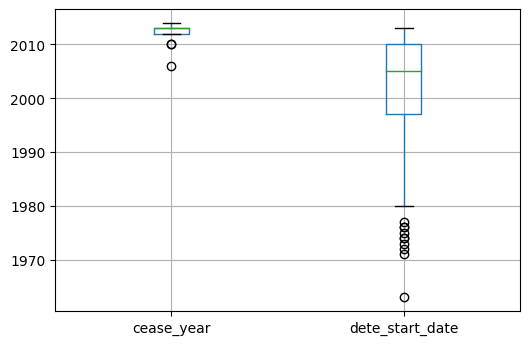

In [36]:
dete_resignations.boxplot(column=['cease_year','dete_start_date'])
plt.show()

1. Cease Years seem fine ranging between 2014 and 2006;
2. Dete Start Dates have most data post 2004, we could filter post mid-90s?

### Service/Tenure in Dete

We need to analyze employees that left after a short period of time: Tafe already has a column for that (institute_service, which is organized in tenure bands), while Dete does not. 
We need to create one and we are going to calculate institute_service as years of service.

In [37]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']

In [38]:
dete_resignations[['institute_service','cease_year','dete_start_date']].head()
# seems fine?

,institute_service,cease_year,dete_start_date
3,7.0,2012.0,2005.0
5,18.0,2012.0,1994.0
8,3.0,2012.0,2009.0
9,15.0,2012.0,1997.0
11,3.0,2012.0,2009.0


## Exploratory Analysis

Research columns for job dissatisfaction:

**Dete:**
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

**Tafe:**
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In [39]:
dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


In [40]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [41]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [42]:
def update_val(value):
    if value == '-':
        return False
    elif (pd.isnull(value)):
        return np.nan
    else:
        return True
# remember to check pd.isnull()
# remember to check np.nan
# redo cleanup steps using applymap instead of apply

In [43]:
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_val)

In [44]:
# check after cleaning Contributing Factors. Dissatisfaction
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [45]:
# Check after cleaning Contributing Factors. Job Dissatisfaction
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [46]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [47]:
tafe_resignations['dissatisfied'].value_counts()

False    270
True      62
Name: dissatisfied, dtype: int64

In [48]:
# runs some checks on dissatisfied
tafe_resignations_2 = tafe_resignations.copy()[(tafe_resignations['Contributing Factors. Dissatisfaction']==True)&
                                              (tafe_resignations['Contributing Factors. Job Dissatisfaction']==False)]
tafe_resignations_2[['dissatisfied','Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].tail(10)

,dissatisfied,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
452,False,True,False
506,False,True,False
512,False,True,False
520,False,True,False
524,False,True,False
525,False,True,False
610,False,True,False
625,False,True,False
627,False,True,False
641,False,True,False


In [49]:
tafe_resignations_up = tafe_resignations.copy()

In [50]:
tafe_resignations_up['institution'] = str('TAFE')

In [51]:
# get dissatisfied for dete survey
dete_diss_col=['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_diss_col].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [52]:
dete_resignations_up = dete_resignations.copy()

In [53]:
dete_resignations_up['institution'] = str('DETE')

Now we are going to combine the datasets and remove all columns with less than 500 non-null values, we are going to use the newly created institution column to the differentiate them within the combined dataset.
We are removing these columns because we don't really have a way to fill them in, they are all survey answers and they are subjective so filling the gap with any technique would not add any value.

In [54]:
combined = pd.concat([tafe_resignations_up, dete_resignations_up])

In [55]:
# fill gender with most common value in the series
# combined['gender'].fillna(combined['gender'].value_counts().index[0], inplace=True)
combined['gender'].fillna('Female',inplace=True)

In [56]:
#combined['age'].fillna(combined['age'].mean, inplace=True)

In [57]:
combined_updated = combined.copy().dropna(thresh=500, axis=1)

In [58]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 821
Data columns (total 56 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   id                                                            651 non-null    float64
 1   Institute                                                     340 non-null    object 
 2   WorkArea                                                      340 non-null    object 
 3   cease_date                                                    635 non-null    object 
 4   separationtype                                                651 non-null    object 
 5   Contributing Factors. Career Move - Public Sector             332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector            332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment           332 non-n

In [59]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 821
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   cease_date         635 non-null    object 
 2   separationtype     651 non-null    object 
 3   gender             651 non-null    object 
 4   age                596 non-null    object 
 5   employment_status  597 non-null    object 
 6   institute_service  563 non-null    object 
 7   dissatisfied       643 non-null    object 
 8   institution        651 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.9+ KB


## Data Cleaning Part 3

In [60]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
17.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
30.0                   2
36.0                   2
28.0                   2
26.0                   2
25.0                   2


'institute_service' column has essentially 2 types of format: tenure band and years, we are going to consolidate into new bands:
-    New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company     


In [61]:
# turn into string
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
# extract years from string
pattern = (r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(pattern)
# turn into float again for formula later
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [62]:
combined_updated['institute_service'].value_counts(dropna=False).sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service, dtype: int64

In [63]:
def upd_years(val):
    if val < 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif val == pd.isnull(val):
        return np.nan
    else:
        return np.nan

In [64]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(upd_years)

In [65]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Based on the classification provided in this article: https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage we categorized institute_service into tenure four tenure bands in a new column called **service_cat**:
- New 
- Experienced
- Established
- Veteran

In order to do so we needed to extract years from different formats (strings), reconvert into values and then categorize with a new function.

## Exploratory Analysis Part 2

We are going to start from column **dissatisfied**: as it's binary we will also convert into 1 True and 0 False.

In [66]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    432
True     211
NaN        8
Name: dissatisfied, dtype: int64

In [67]:
# fill dissatisfied with most common value in the series
combined_updated['dissatisfied'].fillna(combined_updated['dissatisfied'].value_counts().index[0], inplace=True)
# snippet below is to do the same for all columns keep as reference!
# df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [68]:
# check it worked
combined_updated['dissatisfied'].value_counts(dropna=False)

False    440
True     211
Name: dissatisfied, dtype: int64

In [69]:
pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')

,dissatisfied
service_cat,
Established,0.500000
Experienced,0.296512
New,0.248705
Veteran,0.455882


In [70]:
table = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat')

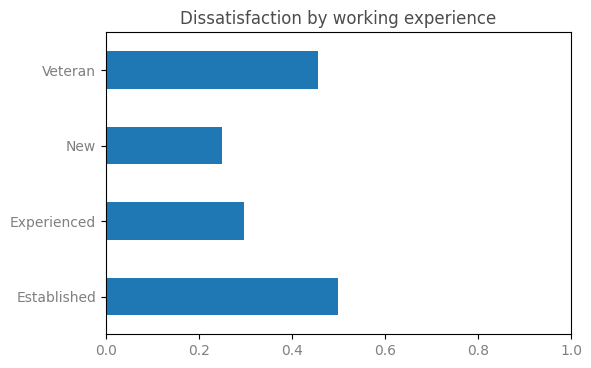

In [71]:
table.plot(kind='barh',y='dissatisfied', legend=False)
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by working experience',alpha=0.7)
plt.show()

Established and Veterans seems to have the largest % of unsatisfied in the service_cat column

## Next Steps 2

We are going to explore further this dataset:
1. How to handle the rest of missing data? - service_cat column?  Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
2. Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
3. Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

4. look into gender and institution then look again into service_cat

### Gender

In [72]:
combined_updated['gender'].value_counts(dropna=False)

Female    483
Male      168
Name: gender, dtype: int64

In [73]:
pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat',columns='gender')

gender,Female,Male
service_cat,,
Established,0.522727,0.444444
Experienced,0.336134,0.207547
New,0.226950,0.307692
Veteran,0.459184,0.447368


In [74]:
table_gender = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat',columns='gender')

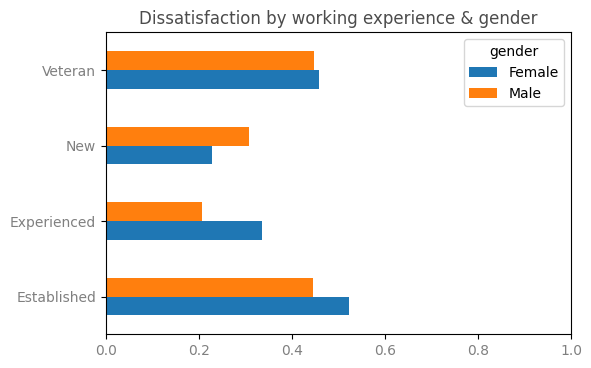

In [75]:
table_gender.plot(kind='barh')
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by working experience & gender',alpha=0.7)
plt.show()

### Age

In [76]:
combined_updated['age'].value_counts(dropna=False)
# we need to clean the age column, we are going to use the same pattern used for years of service

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [77]:
# turn into string
combined_updated['age'] = combined_updated['age'].astype(str)
# extract years from string
pattern = (r'(\d+)')
combined_updated['age'] = combined_updated['age'].str.extract(pattern)
# turn into float again for formula later
combined_updated['age'] = combined_updated['age'].astype(float)

In [82]:
age_mean = combined_updated['age'].mean(skipna=True)

In [83]:
combined_updated['age'].fillna(age_mean, inplace=True)

In [85]:
combined_updated['age'].value_counts(dropna=False)

41.000000    93
46.000000    81
36.000000    73
51.000000    71
26.000000    67
21.000000    62
31.000000    61
39.271812    55
56.000000    55
61.000000    23
20.000000    10
Name: age, dtype: int64

After cleaning up age we can classify by age bands:
1. 0-25
2. 26-35
3. 36-45
4. 46-60
5. 60+

In [87]:
def upd_age(val):
    if val <= 25:
        return '25-'
    elif val <= 35:
        return '26-35'
    elif val <= 45:
        return '36-45'
    elif val <= 60:
        return '46-60'
    elif val > 60:
        return '60+'
    elif val == pd.isnull(val):
        return np.nan
    else:
        return np.nan

In [88]:
combined_updated['age_cat'] = combined_updated['age'].apply(upd_age)

In [89]:
combined_updated[['age_cat','age']].head()

,age_cat,age
3,36-45,39.271812
4,36-45,41.000000
5,46-60,56.000000
6,25-,20.000000
7,46-60,46.000000


In [98]:
table_age = pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat')

In [99]:
pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat')

,dissatisfied
age_cat,
25-,0.250000
26-35,0.375000
36-45,0.266968
46-60,0.357488
60+,0.521739


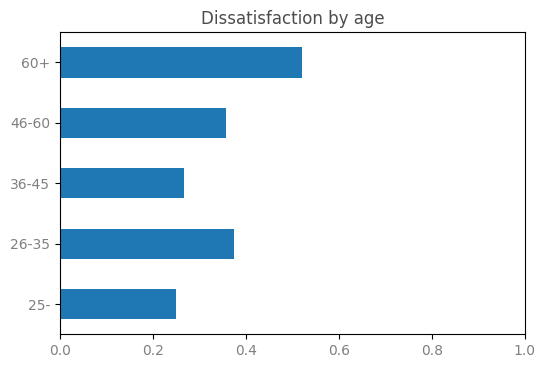

In [100]:
table_age.plot(kind='barh',legend=None)
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by age',alpha=0.7)
plt.show()

### Gender + Age

In [102]:
table_age_gender = pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat', columns='gender')
pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat', columns='gender')

gender,Female,Male
age_cat,,
25-,0.288462,0.150000
26-35,0.367347,0.400000
36-45,0.258621,0.297872
46-60,0.361111,0.349206
60+,0.400000,0.750000


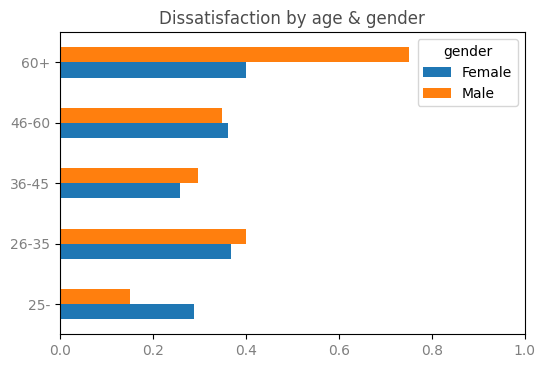

In [113]:
table_age_gender.plot(kind='barh')
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by age & gender',alpha=0.7)
plt.show()

### Age + Service

In [105]:
table_age_service = pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat', columns='service_cat')
pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat', columns='service_cat')

service_cat,Established,Experienced,New,Veteran
age_cat,,,,
25-,0.000000,0.250000,0.227273,NaN
26-35,0.652174,0.382979,0.224490,0.400000
36-45,0.437500,0.300000,0.240741,0.410256
46-60,0.400000,0.224490,0.304348,0.448718
60+,0.500000,0.500000,NaN,0.642857


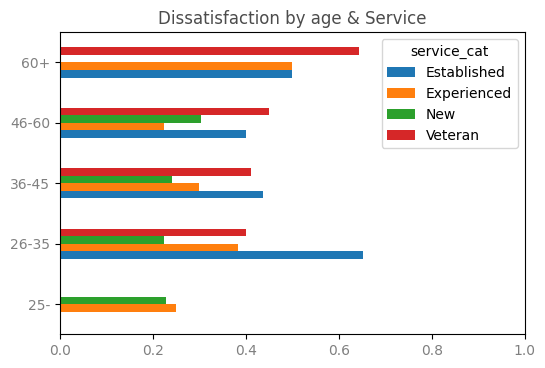

In [112]:
table_age_service.plot(kind='barh')
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by age & Service',alpha=0.7)
plt.show()

### Age + Institution

In [109]:
table_age_institution = pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat', columns='institution')
pd.pivot_table(combined_updated, values='dissatisfied', index='age_cat', columns='institution')

institution,DETE,TAFE
age_cat,,
25-,0.300000,0.214286
26-35,0.562500,0.187500
36-45,0.414894,0.157480
46-60,0.530000,0.196262
60+,0.521739,NaN


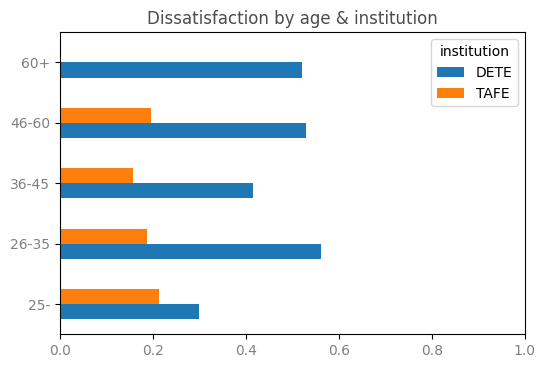

In [111]:
table_age_institution.plot(kind='barh')
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by age & institution',alpha=0.7)
plt.show()

### Gender + Institution

In [114]:
table_gender_institution = pd.pivot_table(combined_updated, values='dissatisfied', index='gender', columns='institution')
pd.pivot_table(combined_updated, values='dissatisfied', index='gender', columns='institution')

institution,DETE,TAFE
gender,,
Female,0.454545,0.182573
Male,0.565217,0.181818


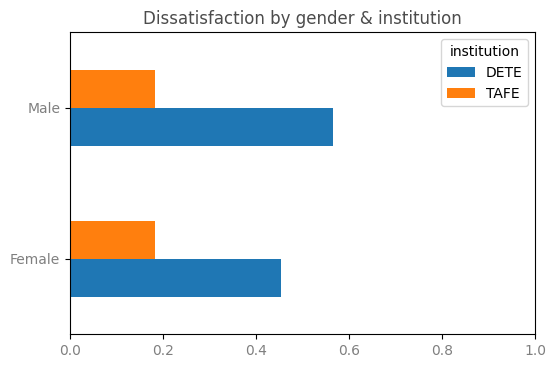

In [115]:
table_gender_institution.plot(kind='barh')
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by gender & institution',alpha=0.7)
plt.show()

### Service Cat + Institution

In [116]:
table_service_institution = pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat', columns='institution')
pd.pivot_table(combined_updated, values='dissatisfied', index='service_cat', columns='institution')

institution,DETE,TAFE
service_cat,,
Established,0.609756,0.285714
Experienced,0.460526,0.166667
New,0.375000,0.197080
Veteran,0.560000,0.166667


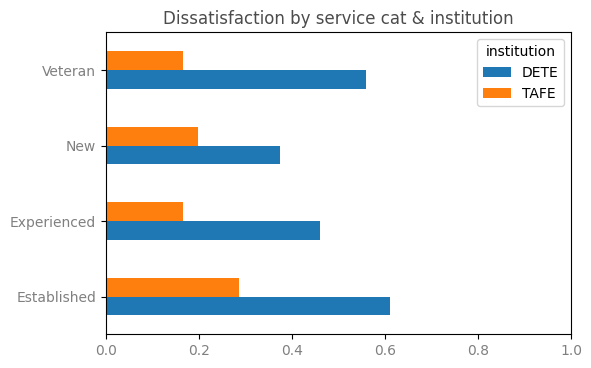

In [117]:
table_service_institution.plot(kind='barh')
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by service cat & institution',alpha=0.7)
plt.show()

## Conclusions

We noticed a couple of patterns while analyzing data:
1. Dete has greater unsatisfaction % across aall categories, with values over 60% in some categories
2. Male employees are disproportionately more unsaftisfied in 60+ age band, while Female employees show the same in the 25 or younger age band
3. Older employees are generally more unsatisfied
4. Veteran and Establish are more unsatisfied, especially in their bands 